In [ ]:
import pandas as pd 
import re

data = pd.read_csv("data/academic_retention_dataset.csv", sep=";")

In [21]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [2]:
data['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [9]:
from src.dataprocess import DataPreprocessorPipeline

data_processor = DataPreprocessorPipeline(df=data)
data_processor.filter_target_values()
data_processor.clean_column_names()
data_processor.plot_distribution_data()
data_processor.preprocess_age_and_admission()
privileged_groups, total_columns = data_processor.get_privileged_groups()
standard_df = data_processor.preprocess_standard_dataset(privileged_groups, total_columns)

c:\Users\dinat\Υπολογιστής\master\master thesis\fairness-ml\src\dataprocess.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df["Target"].replace({"Dropout": 0, "Graduate": 1}, inplace=True)
c:\Users\dinat\Υπολογιστής\master\master thesis\fairness-ml\src\dataprocess.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_s

In [16]:
X, y = standard_df.drop(columns=["Target"]), standard_df["Target"]

In [17]:
y

0       0.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
3625    1.0
3626    0.0
3627    0.0
3628    1.0
3629    1.0
Name: Target, Length: 3630, dtype: float64

In [18]:
X

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance_,Previous_qualification,Previous_qualification__grade_,Nacionality,Mother_s_qualification,Father_s_qualification,...,Curricular_units_1st_sem__without_evaluations_,Curricular_units_2nd_sem__credited_,Curricular_units_2nd_sem__enrolled_,Curricular_units_2nd_sem__evaluations_,Curricular_units_2nd_sem__approved_,Curricular_units_2nd_sem__grade_,Curricular_units_2nd_sem__without_evaluations_,Unemployment_rate,Inflation_rate,GDP
0,1.0,17.0,5.0,171.0,1.0,1.0,122.0,1.0,19.0,12.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
1,1.0,15.0,1.0,9254.0,1.0,1.0,160.0,1.0,1.0,3.0,...,0.0,0.0,6.0,6.0,6.0,13.666667,0.0,13.9,-0.3,0.79
2,1.0,1.0,5.0,9070.0,1.0,1.0,122.0,1.0,37.0,37.0,...,0.0,0.0,6.0,0.0,0.0,0.000000,0.0,10.8,1.4,1.74
3,1.0,17.0,2.0,9773.0,1.0,1.0,122.0,1.0,38.0,37.0,...,0.0,0.0,6.0,10.0,5.0,12.400000,0.0,9.4,-0.8,-3.12
4,2.0,39.0,1.0,8014.0,0.0,1.0,100.0,1.0,37.0,38.0,...,0.0,0.0,6.0,6.0,6.0,13.000000,0.0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1.0,1.0,6.0,9773.0,1.0,1.0,125.0,1.0,1.0,1.0,...,0.0,0.0,6.0,8.0,5.0,12.666667,0.0,15.5,2.8,-4.06
3626,1.0,1.0,2.0,9773.0,1.0,1.0,120.0,105.0,1.0,1.0,...,0.0,0.0,6.0,6.0,2.0,11.000000,0.0,11.1,0.6,2.02
3627,1.0,1.0,1.0,9500.0,1.0,1.0,154.0,1.0,37.0,37.0,...,0.0,0.0,8.0,9.0,1.0,13.500000,0.0,13.9,-0.3,0.79
3628,1.0,1.0,1.0,9147.0,1.0,1.0,180.0,1.0,37.0,37.0,...,0.0,0.0,5.0,6.0,5.0,12.000000,0.0,9.4,-0.8,-3.12


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

c:\Users\dinat\Υπολογιστής\master\master thesis\fairness-ml\.venv\lib\site-packages\xgboost\core.py:158: UserWarning: [16:51:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

         0.0       0.94      0.83      0.88       284
         1.0       0.90      0.96      0.93       442

    accuracy                           0.91       726
   macro avg       0.92      0.90      0.91       726
weighted avg       0.91      0.91      0.91       726



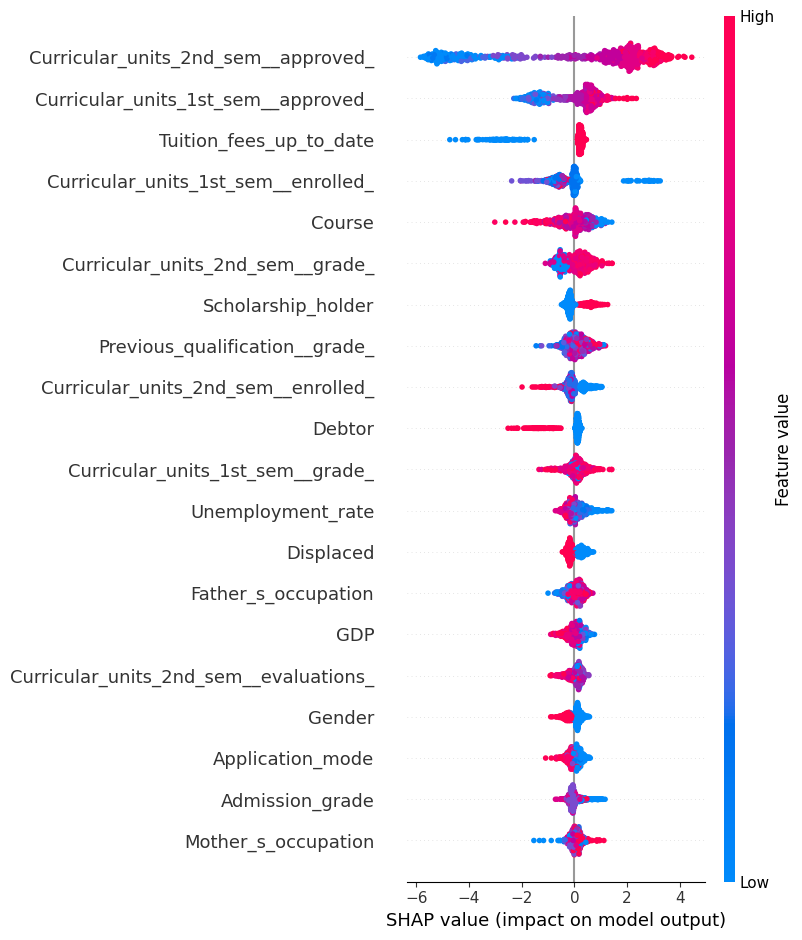

In [20]:
# Train XGBoost model and compute SHAP values
from xgboost import XGBClassifier
import shap
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# Train XGBoost
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# SHAP values
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, show=False)
plt.show()

In [24]:
data[data['Debtor']==1]['Target'].value_counts()

Target
Dropout     312
Graduate    101
Enrolled     90
Name: count, dtype: int64

In [25]:
def remove_leakage_features(df):
    leakage_columns = [
        'Curricular units 1st sem (approved)',
        'Curricular units 1st sem (grade)',
        'Curricular units 1st sem (credited)',
        'Curricular units 1st sem (without evaluations)',
        'Curricular units 2nd sem (approved)',
        'Curricular units 2nd sem (grade)',
        'Curricular units 2nd sem (credited)',
        'Curricular units 2nd sem (without evaluations)',
        'Curricular units 1st sem (evaluations)',
        'Curricular units 2nd sem (evaluations)',
        'Tuition fees up to date',
        'Debtor',
    ]
    return df.drop(columns=[col for col in leakage_columns if col in df.columns])

# Example usage:
data_clean = remove_leakage_features(data)
data_clean.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Gender',
       'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 2nd sem (enrolled)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Target'],
      dtype='object')

In [27]:
import re

def clean_column_names(df):
    """
    Clean and standardize column names in a DataFrame:
    - Lowercase all column names
    - Replace spaces and special characters with underscores
    - Remove parentheses and extra underscores
    """
    df = df.copy()
    df.columns = [
        re.sub(r'\s+', '_', col.lower()) for col in df.columns
    ]
    df.columns = [
        re.sub(r'[()\[\]{}]', '', col) for col in df.columns
    ]
    df.columns = [
        re.sub(r'__+', '_', col) for col in df.columns
    ]
    return df

# Example usage:
data_cleaned = clean_column_names(data)
data_cleaned.columns

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime/evening_attendance_', 'previous_qualification',
       'previous_qualification_grade', 'nacionality', 'mother's_qualification',
       'father's_qualification', 'mother's_occupation', 'father's_occupation',
       'admission_grade', 'displaced', 'educational_special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'age_at_enrollment', 'international',
       'curricular_units_1st_sem_credited',
       'curricular_units_1st_sem_enrolled',
       'curricular_units_1st_sem_evaluations',
       'curricular_units_1st_sem_approved', 'curricular_units_1st_sem_grade',
       'curricular_units_1st_sem_without_evaluations',
       'curricular_units_2nd_sem_credited',
       'curricular_units_2nd_sem_enrolled',
       'curricular_units_2nd_sem_evaluations',
       'curricular_units_2nd_sem_approved', 'curricular_units_2nd_sem_grade',
       'curricular_units_2nd_se

In [28]:
def fix_column_names(df):
    """
    - Capitalize the first letter of each column name
    - Replace 'nacionality' with 'Nationality'
    """
    df = df.copy()
    new_columns = []
    for col in df.columns:
        if col.lower() == 'nacionality':
            new_columns.append('Nationality')
        else:
            # Capitalize first letter, keep underscores
            new_columns.append(col[:1].upper() + col[1:])
    df.columns = new_columns
    return df

# Example usage:
data_fixed = fix_column_names(data)
data_fixed.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [ ]:
import re

def preprocess_columns(df):
    """
    1. Remove leakage-prone columns
    2. Clean and standardize column names (lowercase, underscores, remove parentheses)
    3. Capitalize first letter of each column
    4. Replace 'nacionality' with 'Nationality'
    """
    df = df.copy()
    # Remove leakage columns
    leakage_columns = [
        'Curricular units 1st sem (approved)',
        'Curricular units 1st sem (grade)',
        'Curricular units 1st sem (credited)',
        'Curricular units 1st sem (without evaluations)',
        'Curricular units 2nd sem (approved)',
        'Curricular units 2nd sem (grade)',
        'Curricular units 2nd sem (credited)',
        'Curricular units 2nd sem (without evaluations)',
        'Curricular units 1st sem (evaluations)',
        'Curricular units 2nd sem (evaluations)',
        'Tuition fees up to date',
        'Debtor',
    ]
    df = df.drop(columns=[col for col in leakage_columns if col in df.columns])
    # Clean column names
    cols = [re.sub(r'\s+', '_', col.lower()) for col in df.columns]
    cols = [re.sub(r'[()\[\]{}]', '', col) for col in cols]
    cols = [re.sub(r'__+', '_', col) for col in cols]
    # Capitalize first letter, fix 'nacionality'
    new_columns = []
    for col in cols:
        if col == 'nacionality':
            new_columns.append('Nationality')
        else:
            new_columns.append(col[:1].upper() + col[1:])
    df.columns = new_columns
    return df

# Example usage:
data_preprocessed = preprocess_columns(data)
data_preprocessed.columns